In [65]:
def change_device(tensor: torch.Tensor, device="cuda"):
  return tensor.to(device)

def setup_device():
    return "cuda" if  torch.cuda.is_available() else "cpu"


def change_dtype(tensor:torch.Tensor, dtype=torch.float):
  """
    dtype must have the value mentioned in the torch documentation
    e.g. torch.float , torch.LongTensor
  """
  return tensor.to(dtype)
def show_image(image, label=None, is_squeeze_req:bool=False):
  """
    show image on the screen
    require convert_to_numpy function to be called first
  """
  if label is None:
    label = "Image Caption"
  plt.figure(figsize=(4,4))
  plt.imshow(convert_to_numpy(image))
  plt.title(label)
  plt.axis(False)

def convert_to_tensor(array, is_change_dtype=False, is_change_device=False, to_device="cpu")->torch.Tensor:
  """
  convert numpy array to tensor
  is_change_dtype=True will change the dtype to float
  """

  tensor = None
  if torch.is_tensor(array):
     tensor = array
  else:
     tensor = torch.from_numpy(array)
  
  if is_change_dtype: 
    tensor = change_dtype(tensor)
  
  if is_change_device: 
    tensor = change_device(tensor, device=to_device)
  
  return tensor

# convert_to_tensor(random.rand(2,3),is_change_dtype=True)

In [66]:
def convert_to_numpy(tensor:torch.Tensor):
  """
  convert tensor to numpy
  """
  try:
    return tensor.cpu() if tensor.ndim > 1 else "tensor ndim must be greater than 1"
      
  except:
    return "Something went wrong while converting tensor to numpy"

In [67]:
def show_image(image, label=None, cmap:str="gray",figsize:tuple = (4,4), is_squeeze_not_req:bool=False):
  """
    show image on the screen
    require convert_to_numpy function to be called first
  """
  if label is None:
    label = "Image Caption"
  plt.figure(figsize=figsize)
  plt.imshow(convert_to_numpy(image if is_squeeze_not_req else image.squeeze()), cmap=cmap)
  plt.title(label)
  plt.axis(False)

In [68]:
def show_multi_images(data: torch.Tensor, figsize:tuple=(9,9), rows:int=3, cols:int=3, classes=None,
                      cmap="gray", is_require_squeeze:bool=True):
  """
  classes list|dict
  require convert_to_numpy function to be called first
  """
  DEFAULT_LABEL = None
  if classes is None:
    DEFAULT_LABEL = "Image Caption"
  
  figure = plt.figure(figsize=figsize)
  cols, rows = cols, rows
  for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(data), size=(1,)).item()
      img, label = data[sample_idx]
      figure.add_subplot(rows, cols, i)
      plt.title(DEFAULT_LABEL if classes is None else classes[label])
      plt.axis(False)
      plt.imshow(convert_to_numpy(img.squeeze() if is_require_squeeze else img), cmap=cmap)
  plt.show()


In [69]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import random
from torch import nn

try:
  from torchsummary import summary
except:
  !pip install torchsummary
  from torchsummary import summary

try:
  from torchmetrics import Accuracy
except:
  !pip install torchmetrics
  from torchmetrics import Accuracy
  
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [70]:

from torchvision.datasets import CIFAR100

In [71]:
ROOT_DIR = "data"

train_data = CIFAR100(
    root=ROOT_DIR,
    download=True,
    transform=ToTensor()
)

test_data = CIFAR100(
    root=ROOT_DIR,
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


In [72]:
def convert_to_numpy(tensor:torch.Tensor):
  """
  convert tensor to numpy
  """
  try:
    return tensor.cpu() if tensor.ndim > 1 else "tensor ndim must be greater than 1"
      
  except:
    return "Something went wrong while converting tensor to numpy"

In [73]:
def show_image(image, label=None, cmap:str="gray",figsize:tuple = (4,4), is_squeeze_not_req:bool=False,
               is_img_rgb:bool=False):
  """
    show image on the screen
    require convert_to_numpy function to be called first
  """
  if label is None:
    label = "Image Caption"
  if is_img_rgb:
    image = image.permute(1,2,0)
  
  plt.figure(figsize=figsize)
  plt.imshow(convert_to_numpy(image if is_squeeze_not_req else image.squeeze()), cmap=cmap)
  plt.title(label)
  plt.axis(False)

In [74]:
len(train_data)
len(test_data)

10000

In [7]:
BATCH = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH, shuffle=True)
# print(len(train_dataloader))

# X_train , y_train = next(iter(train_dataloader))
# sample_index = torch.randint(len(range(BATCH)), size=(1,)).item()
# show_image(X_train[sample_index], label=train_classes[y_train[sample_index]])

In [8]:
train_classes = train_data.classes
print(f"type-> {type(train_classes)} len->{len(train_classes)}")


type-> <class 'list'> len->100


In [9]:
b, (x,y) = next(enumerate(train_dataloader))
y.shape

torch.Size([32])

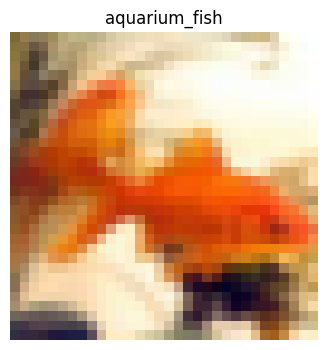

In [10]:
sample_index = torch.randint(len(x), size=(1,)).item()
show_image(image=x[sample_index], label=train_classes[y[sample_index]], is_img_rgb=True)
# show_multi_images(data=x, classes=train_classes)


In [55]:
class FashtionClassification(nn.Module):
  def __init__(self,input_channel,hidden_channel,output_channel):
    super().__init__()
    self.input_channel = input_channel
    self.hidden_channel = hidden_channel
    self.output_channel = output_channel

    self.layer1 = nn.Sequential(
                               nn.Conv2d(in_channels=self.input_channel,out_channels=self.hidden_channel,kernel_size=3),
                               nn.ReLU(),
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3),
                               nn.ReLU(),
                               nn.MaxPool2d(kernel_size=2,padding=1,stride=2)
    )
    self.layer2 = nn.Sequential(
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3),
                               nn.ReLU(),
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3)
                                ,nn.MaxPool2d(kernel_size=2,padding=1,stride=2)
    )
    self.layer21 = nn.Sequential(
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3),
                               nn.ReLU(),
                               nn.Conv2d(in_channels=self.hidden_channel,out_channels=self.hidden_channel,kernel_size=3)
                                ,nn.MaxPool2d(kernel_size=2,padding=1,stride=2)
    )
    self.layer3 = nn.Sequential(
                                nn.Flatten(),
                                nn.Linear(in_features=1152, out_features=100),
                                nn.ReLU(),
                                nn.Linear(in_features=100, out_features=self.output_channel)    ,                         
                                nn.ReLU(),
    )

  
  def forward(self,x):
    return self.layer3(self.layer2(self.layer1(x)))



In [57]:
DEVICE = setup_device()
print(DEVICE)

cpu


In [58]:
from torchsummary import summary

In [59]:
model0 = change_device(FashtionClassification(input_channel=3,hidden_channel=32,output_channel=len(train_classes)), device=DEVICE)

In [60]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model0.parameters(), lr=0.1)

In [61]:
summary(model0, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
              ReLU-2           [-1, 32, 30, 30]               0
            Conv2d-3           [-1, 32, 28, 28]           9,248
              ReLU-4           [-1, 32, 28, 28]               0
         MaxPool2d-5           [-1, 32, 15, 15]               0
            Conv2d-6           [-1, 32, 13, 13]           9,248
              ReLU-7           [-1, 32, 13, 13]               0
            Conv2d-8           [-1, 32, 11, 11]           9,248
         MaxPool2d-9             [-1, 32, 6, 6]               0
          Flatten-10                 [-1, 1152]               0
           Linear-11                  [-1, 100]         115,300
             ReLU-12                  [-1, 100]               0
           Linear-13                  [-1, 100]          10,100
             ReLU-14                  [

In [62]:
DEVICE

'cpu'

In [63]:
EPOCHS = 1
total_batches = 0
loss_metrics = []
accuracy_metrics = []

accuracy_fn = Accuracy(task="multiclass", num_classes=len(train_classes))

for epoch in range(EPOCHS):
  model0.train()
  for batch, (X_data, y_train) in enumerate(train_dataloader):
    # print(f"epoch -> {batch} X_data->{X_data.shape} y_train->{y_train.shape}")
    # break
    X_data = change_device(tensor=X_data, device=DEVICE)
    y_train = change_device(tensor=y_train, device=DEVICE)

    y_pred = model0(X_data)#.to(torch.cuda.FloatTensor))
    # print(y_pred.shape)
    loss = loss_fn(y_pred,y_train)
    acc = accuracy_fn(y_pred,y_train)  
    
    # if batch%20 == 0:
    #   loss_metrics.append(loss.item())
    #   accuracy_metrics.append(acc.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  for batch, (X_test, y_test) in enumerate(test_dataloader):
    # print(f"epoch -> {batch} X_test->{X_test.shape} y_test->{y_test.shape}")
    # break
    X_test = change_device(tensor=X_test, device=DEVICE)
    y_test = change_device(tensor=y_test, device=DEVICE)

    y_pred = model0(X_test)
    # print(y_pred.shape)
    loss_test = loss_fn(y_pred,y_test)
    acc_test = accuracy_fn(y_pred,y_test)  
    
    if batch%100 == 0:
      loss_metrics.append(loss.item())
      accuracy_metrics.append(acc.item())
      print(f"loss-> {loss:.5f} loss_test->{loss_test:.5f} acc-> {acc} acc_test {acc_test}")
  # print(loss)
# print(loss_metrics[-1])
# print(accuracy_metrics[-1])

loss-> 4.32837 loss_test->4.19894 acc-> 0.0 acc_test 0.0625
loss-> 4.32837 loss_test->4.38154 acc-> 0.0 acc_test 0.09375
loss-> 4.32837 loss_test->4.26242 acc-> 0.0 acc_test 0.125
loss-> 4.32837 loss_test->4.16332 acc-> 0.0 acc_test 0.03125


In [64]:
model0.eval()
with torch.inference_mode():
  for batch, (X_test,y_test) in enumerate(test_dataloader):
    y_pred_test = model0(change_dtype(X_test))
    loss_test = loss_fn(y_pred_test,y_test)
    acc = accuracy_fn(y_pred_test,y_test)
  print(f"loss -> {loss_test:.5f} acc->{acc:.5f}")

loss -> 4.21313 acc->0.18750
